# Quelques exemples...

## Concrètement...

Un système de cellules.

In [1]:
print("Des cellules de code.")

Des cellules de code.


Des cellules de texte.

---

Ici, on peut écrire :

* Du **Markdown**
* Du <a href="https://fr.wikipedia.org/wiki/Hypertext_Markup_Language">HTML</a>
* Du $\LaTeX$

## Charger un CSV, produire des graphiques (avec Python)

##### (mais on peut le faire avec d'autres langages aussi !)

Commençons par charger un jeu de données avec lequel travailler. Il s'agit ici d'un jeu de données constitué à partir de l'intégralité d'une série d'articles Wikipedia liés au terme "Révolution".

In [16]:
#!pip install pandas matplotlib seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/revolution_wiki.csv", sep=";")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,liens,nom_page,full_text
0,https://fr.wikipedia.org/wiki/R%C3%A9volution_...,Révolution industrielle,Révolution industrielle Un art...
1,https://fr.wikipedia.org/wiki/R%C3%A9volution_...,Révolution (politique et sociale),Révolution Un article de Wikip...
2,https://fr.wikipedia.org/wiki/R%C3%A9volution_...,Révolution sociale,Révolution sociale Un article ...
3,https://fr.wikipedia.org/wiki/R%C3%A9volution_...,Révolution néolithique,Révolution néolithique Un arti...
4,https://fr.wikipedia.org/wiki/R%C3%A9volution_...,Révolution agricole,Révolution agricole Un article...


Créons rapidement un dictionnaire qui associe à chaque article, sa longueur (en nombre de caractères).

In [2]:
import re

lengths = {}

for ind, row in df.iterrows():
    lengths[df.at[ind, "nom_page"]] = len(df.at[ind, "full_text"])

In [3]:
leng = pd.Series(lengths)

Remettons un peu d'ordre et faisons apparaître les données en partant de l'article le plus long, jusqu'au moins long.

In [4]:
leng_ord = leng.sort_values(axis=0, ascending=False)

Pour que le graphique soit plus digeste, affichons uniquement les 10 premiers articles.

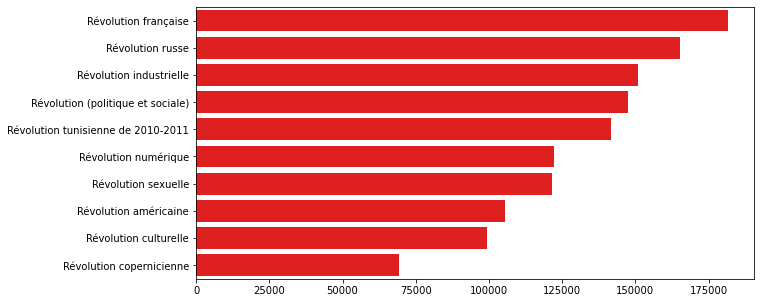

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(x=leng_ord[:10], y=leng_ord[:10].index, color="red")
plt.show();

## Manipuler des tableaux

Jupyter dispose de divers widgets qui permettent d'ajouter un niveau d'interactivité pour retrouver notamment des fonctionnalités plus propres à certains logiciels de traitement de données interactifs comme Excel.

In [ ]:
#!pip install qgrid

In [6]:
import qgrid
import pandas as pd

In [7]:
df = pd.read_csv("data/data_tour.csv")
df.drop(columns=df.columns[14:], inplace=True)
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [8]:
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Canvas API

Avec l'API canvas d'HTML/JavaScript, on peut directement utiliser Python pour dessiner dans Jupyter et afficher directement le résultat, de la même façon que pour des graphiques.

In [9]:
#!pip install ipycanvas numpy

In [10]:
from ipycanvas import Canvas
import numpy as np
import random

In [11]:
random_x = []
random_y = []
random_h = []
random_colors = ["red", "blue", "green", "yellow", "pink", "black", "violet", "brown"]


for n in range(20):
    random_x.append(random.randint(1, 800))
    random_y.append(random.randint(1, 300))
    random_h.append(random.randint(1, 60))

In [12]:
canvas = Canvas(width=800, height=300)
for n in range(50):
    canvas.fill_style = random.choice(random_colors)
    choice = random.choice(random_h)
    if choice >= 30:
        canvas.fill_rect(random.choice(random_x), random.choice(random_y), choice, height=None)
    else:
        canvas.fill_circle(random.choice(random_x), random.choice(random_y), choice)
canvas

Canvas(height=300, width=800)

## Travailler avec des fichiers audio

Jupyter permet également de travailler avec des fichiers audio confortablement en permettant, notamment, d'importer et de pouvoir lire directement les fichiers dans le notebook.

In [13]:
#!pip install librosa

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [15]:
x, sr = librosa.load("data/fireplace.mp3")

/Users/romainmularczyk/anaconda3/envs/data_science/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


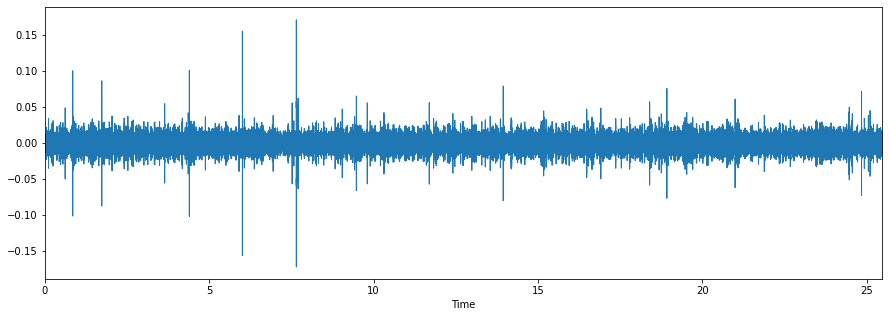

In [16]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)

In [17]:
ipd.Audio("data/fireplace.mp3")

## Mettre en forme les notations mathématiques avec LaTeX

Jupyter interprète LaTeX et permet également d'exporter l'intégralité de son notebook au format .tex. Pour cela, on utilise une cellule texte et on entoure de deux signes `$` la chaîne de caractères que l'on veut écrire en LaTeX.

$1 + \frac{1}{2} = \frac{3}{2}$

On peut facilement écrire des choses plus compliquées, mais rien de nouveau de ce côté, c'est LaTeX qui fait tout le travail et Jupyter qui affiche !

In [17]:
import numpy as np

A = np.tri(2, 4, 1, dtype="int")
A

array([[1, 1, 0, 0],
       [1, 1, 1, 0]])

$A = \begin{pmatrix}
1 & 1 & 0 & 0 \\
1 & 1 & 1 & 0
\end{pmatrix}$

Ou encore...

$J = \sum^{N}_{n=1} \sum^{K}_{k=1} r_{nk} \lVert x_{n} - \mu_{k} \rVert^{2}$

## Insérer du contenu média

On peut insérer toute sorte de contenu média dans un notebook...

In [18]:
from IPython.display import IFrame, HTML

... d'une simple page web...

In [19]:
IFrame("https://fr.wikipedia.org/wiki/Régression_linéaire", width=800, height=600)

... à un fichier PDF...

In [20]:
IFrame("https://arxiv.org/pdf/1405.4053.pdf", width=800, height=600)

... jusqu'à une vidéo ou n'importe quel autre type de contenu.

In [21]:
HTML("<iframe frameborder='0' marginheight ='0' marginwidth='0' scrolling ='no' src='https://player.ina.fr/player/embed/I00017840/1/1b0bd203fbcd702f9bc9b10ac3d0fc21/wide/1' allow='fullscreen,autoplay' width=450 height=300></iframe>")

/Users/romainmularczyk/anaconda3/envs/data_science/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Insérer du HTML et des composants Bootstrap

Comme Jupyter comprend Markdown, il comprend mécaniquement HTML. A noter que l'on peut aussi exporter un fichier construit avec Jupyter en format HTML et ainsi le rendre notamment accessible et visualisable aisément sur n'importe quel site web.

Pour s'en convaincre, voir notamment le résultat sur GitHub notamment : https://github.com/RomainMularczyk/datashs2020_jupyter/blob/master/Quelques%20exemples.ipynb

On peut donc insérer n'importe quel type de balise HTML dans un document Jupyter.

<span>Ceci est un formulaire de zone de texte HTML :</span>
<form><textarea></textarea></form>

Jupyter interprète également les éléments HTML et CSS Bootstrap.

<div class="alert alert-danger" role="alert">
    Jupyter comprend Bootstrap !
</div>

<table class="table">
  <thead>
    <tr>
      <th scope="col">Date</th>
      <th scope="col">First</th>
      <th scope="col">Second</th>
      <th scope="col">Third</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">2018</th>
      <td>Thomas</td>
      <td>Dumoulin</td>
      <td>Froome</td>
    </tr>
    <tr>
      <th scope="row">2019</th>
      <td>Bernal</td>
      <td>Thomas</td>
      <td>Kruijswijk</td>
    </tr>
    <tr>
      <th scope="row">2020</th>
      <td>Pogacar</td>
      <td>Roglic</td>
      <td>Porte</td>
    </tr>
  </tbody>
</table>

## Entrer des commandes Bash

Dans une cellule "code", en faisant précéder une commande Bash par un le signe `!`, on peut également se servir de Jupyter comme d'un simili-terminal (du moins, on peut visualiser le retour de la console et envoyer des commandes Bash).

In [18]:
!ls

Data SHS 2020 - Rédiger des documents avec Jupyter.ipynb
Quelques exemples.ipynb
count.png
data


In [19]:
!mkdir test

In [20]:
!ls

Data SHS 2020 - Rédiger des documents avec Jupyter.ipynb
Quelques exemples.ipynb
count.png
data
test


In [21]:
!touch fichier_test.txt

In [22]:
!ls

Data SHS 2020 - Rédiger des documents avec Jupyter.ipynb
Quelques exemples.ipynb
count.png
data
fichier_test.txt
test
